# Proyecto Dinámica de Sistemas Mecánicos

## Imports Brutales

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib as mpl
from IPython.display import HTML,display
import seaborn as sb
from sympy import acot, sqrt,cos,simplify
%matplotlib inline

# Modulos de las velocidades Angulares de las ruedas

Primero definimos los parametros necesarios 

In [12]:
# Parametros
R=5
u=1.8
d=1.6
l=4.5
h=0.6

Generamos un espacio lineal para los timepos desde 0 a 100 segundos por mediode la libreria numpy

In [13]:
t=np.linspace(0,100,1000)

Ahora definiremos las funciones de cada velicdad angular (para cada rueda) segun los tiempos y la velocidad angular de la rueda tracera izquierda.

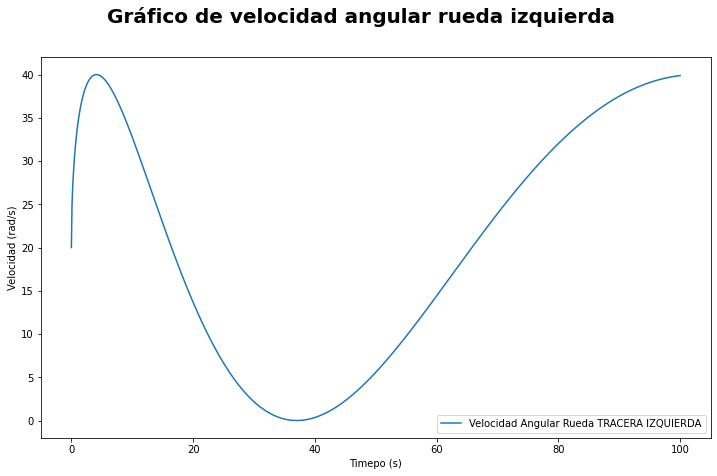

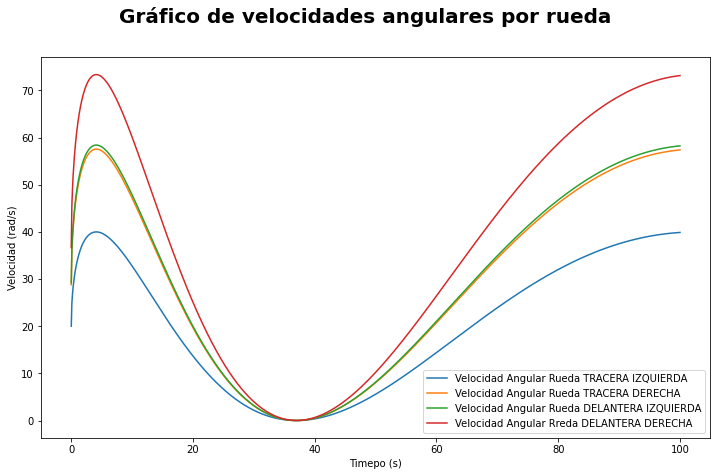

In [14]:
w_rueda_trasera_izq = lambda t: 20*(1+np.sin((0.6*t)**(1/2)))

plt.figure(figsize=(12,7))
plt.plot(t, W_r_t_i_t,label='Velocidad Angular Rueda TRACERA IZQUIERDA')
plt.suptitle('Gráfico de velocidad angular de rueda izquierda ',fontsize=20, fontweight='bold')
plt.ylabel('Velocidad (rad/s)')
plt.xlabel('Timepo (s)')
plt.legend(loc='best')
plt.show()


w_rueda_trasera_der = lambda w: w*((2*R+u)/(2*R-u))

phi=np.arctan((2*l)/(2*R-u)) #0.831876294748451
lamda=np.arctan((2*l)/(2*R+u)) #0.651587185922858

w_rueda_delantera_izq=lambda w: np.sqrt((w/(2*R-u)*(2*l/(np.sin(phi))-u+d))
                                        **2*(np.cos(phi)**2+np.sin(phi)**2))
w_rueda_delantera_der=lambda w: np.sqrt((w/(2*R-u)*(2*l/(np.sin(lamda))+u-d))
                                        **2*(np.cos(lamda)**2+np.sin(lamda)**2))


W_r_t_i_t = w_rueda_trasera_izq(t)
W_r_t_d_w = w_rueda_trasera_der(W_r_t_i_t)
W_r_d_i_w = w_rueda_delantera_izq(W_r_t_i_t)
W_r_d_d_w = w_rueda_delantera_der(W_r_t_i_t)
plt.figure(figsize=(12,7))
plt.plot(t, W_r_t_i_t,label='Velocidad Angular Rueda TRACERA IZQUIERDA')
plt.plot(t, W_r_t_d_w,label='Velocidad Angular Rueda TRACERA DERECHA')
plt.plot(t, W_r_d_i_w,label='Velocidad Angular Rueda DELANTERA IZQUIERDA')
plt.plot(t, W_r_d_d_w,label='Velocidad Angular Rreda DELANTERA DERECHA')

plt.suptitle('Gráfico de velocidades angulares por rueda',fontsize=20, fontweight='bold')
plt.ylabel('Velocidad (rad/s)')
plt.xlabel('Timepo (s)')
plt.legend(loc='best')
plt.show()

## Modulo velociadades angulares de las ruedas segun el valor de R

Primero definimos los parametros necesarios 

In [6]:
# Parametros
u = 1.8
d = 1.6
l = 4.5
h = 0.6
w = 17

Generamos un espacio lineal para los timepos desde 0 a 100 segundos por mediode la libreria numpy

In [7]:
t=np.linspace(0,100,1000)

Ahora definiremos la funcion del radio R, los angulos lambda y phi segun t

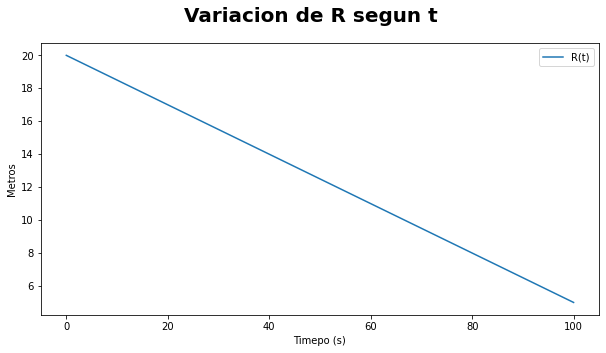

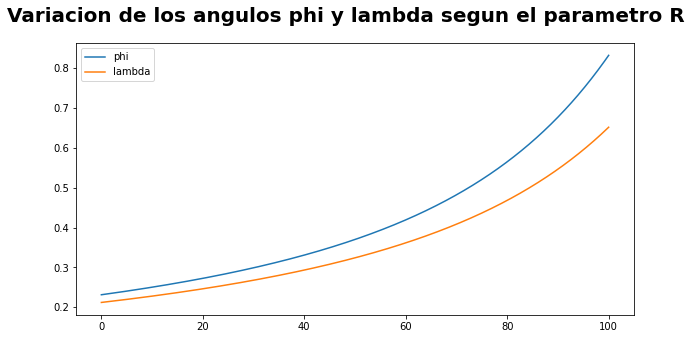

In [8]:
R = lambda t: -0.15*t+20
phi=np.arctan((2*l)/(2*R(t)-u))
lambd=np.arctan((2*l)/(2*R(t)+u))

plt.figure(figsize=(10,5))
plt.suptitle('Variacion de R segun t',fontsize=20, fontweight='bold')
plt.plot(t,R(t),label='R(t)')
plt.ylabel('Metros')
plt.xlabel('Timepo (s)')
plt.legend(loc='best')
plt.show()

plt.figure(figsize=(10,5))
plt.suptitle('Variacion de los angulos phi y lambda segun el parametro R',fontsize=20, fontweight='bold')
plt.plot(t,phi,label='phi')
plt.plot(t,lambd,label='lambda')
plt.ylabel('Valor rad')
plt.xlabel('Timepo (s)')
plt.legend(loc='best')
plt.show()

Finalmente generamos nuestras velocidades, las cuales estan enfuncion del timepo, el radio y los angulos phi, lambda.

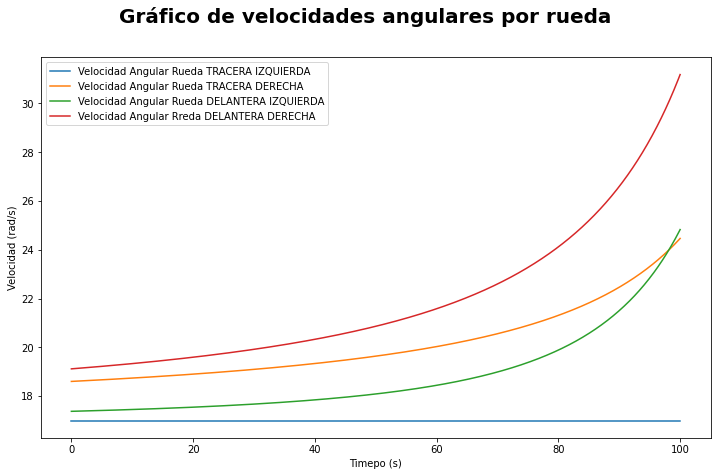

In [10]:
w=lambda t: 17+t*0

W_r_t_d_w =  w(t)*((2*R(t)+u)/(2*R(t)-u))
W_r_d_i_w= np.sqrt((w(t)/(2*R(t)-u)*(2*l/(np.sin(phi))-u+d))**2*(np.cos(phi)**2+np.sin(phi)**2))
W_r_d_d_w= np.sqrt((w(t)/(2*R(t)-u)*(2*l/(np.sin(lambd))+u-d))**2*(np.cos(lambd)**2+np.sin(lambd)**2))


plt.figure(figsize=(12,7))
plt.plot(t, w(t),label='Velocidad Angular Rueda TRACERA IZQUIERDA')
plt.plot(t, W_r_t_d_w,label='Velocidad Angular Rueda TRACERA DERECHA')
plt.plot(t, W_r_d_i_w,label='Velocidad Angular Rueda DELANTERA IZQUIERDA')
plt.plot(t, W_r_d_d_w,label='Velocidad Angular Rreda DELANTERA DERECHA')

plt.suptitle('Gráfico de velocidades angulares por rueda',fontsize=20, fontweight='bold')
plt.ylabel('Velocidad (rad/s)')
plt.xlabel('Timepo (s)')
plt.legend(loc='best')
plt.show()

Celdas innecesarias

In [ ]:
import sympy as sy
import numpy as np
from sympy.functions import *

x = sy.Symbol("x")
f = acot(x)
func_lambda = sy.lambdify(x, f, modules=["numpy", {"acot":acot}])
print(func_lambda(1).evalf())

In [ ]:
vfunc = np.vectorize(func_lambda)
x1 = np.linspace(-10, 10 , 0)
plt.plot(x1, np.cos(x1),label="acot")
plt.show()